In [2]:
# Hagen. Deep-LC vs indiSplit 
w_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

no_aug = {
    'ch1': [20.49, 24.06, 28.15, 32.08, 34.43, 33.78, 32.98, 32.06, 31.22],
    'ch2': [21.51, 23.57, 26.72, 30.69, 34.46, 36.04, 36.36, 35.84, 35.02],
}

uniform_aug = {
    'ch1': [25.74, 27.98, 29.79, 31.14, 32.16, 33.31, 34.97, 37.22, 40.37],
    'ch2': [24.69, 26.8, 28.82, 30.73, 32.92, 35.41, 38.0, 40.96, 45.05],
}

indi_aug = {
    'ch1': [25.11, 27.71, 29.88, 31.51, 32.97, 33.6, 34.97, 36.8, 39.88],
    'ch2': [24.43, 26.55, 28.78, 31.15, 33.66, 35.77, 37.84, 40.4, 44.05],
}

indisplit = {
    'ch1': [28.62, 31.35, 32.75, 33.26, 33.54, 34.03, 35.47, 37.89, 42.49],
    'ch2': [25.51, 27.71, 29.87, 31.78, 34.18, 36.9, 40.0, 42.98, 46.73],
}

/group/jug/ashesh/indiSplitResults//augmentation_analysis_hagen.png


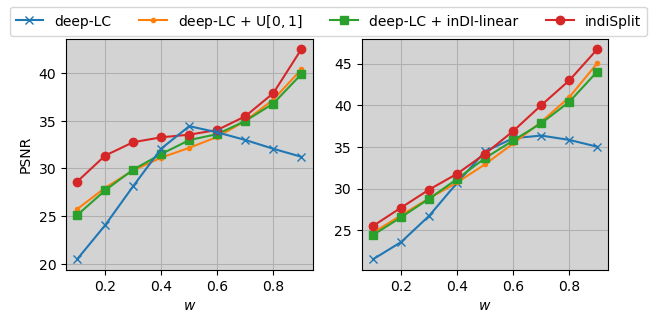

In [58]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,3),ncols=2)

outputdir = '/group/jug/ashesh/indiSplitResults/'


handle1 = ax[0].plot(w_list, no_aug['ch1'], label='deep-LC', marker='x', zorder=10)
handle2 =ax[0].plot(w_list, uniform_aug['ch1'], label='deep-LC + U$[0,1]$', marker='.')
handle3 =ax[0].plot(w_list, indi_aug['ch1'], label='deep-LC + inDI-linear',marker='s')
handle4 =ax[0].plot(w_list, indisplit['ch1'], label='indiSplit', marker='o')

# labels = ['deep-LC', 'deep-LC + U$[0,1]$', 'deep-LC + inDI-linear', 'indiSplit']
# handles = [handle1, handle2, handle3, handle4]
handles, labels = ax[0].get_legend_handles_labels()

ax[1].plot(w_list, no_aug['ch2'], label='Aug: None', marker='x' )
ax[1].plot(w_list, uniform_aug['ch2'], label='Aug: U$[0,1]$', marker='.')
ax[1].plot(w_list, indi_aug['ch2'], label='Aug: inDI-linear',marker='s')
ax[1].plot(w_list, indisplit['ch2'], label='indiSplit', marker='o')


ax[0].set_xlabel('$w$')
ax[1].set_xlabel('$w$')

# ax[0].legend(loc=(0.6,0.05))
plt.figlegend(handles, labels, loc = 'upper center', ncol=5, labelspacing=0.)
# fig.legend(handles, labels, loc='center left')

ax[0].grid()
ax[1].grid()
ax[0].set_facecolor('lightgray')
ax[1].set_facecolor('lightgray')
ax[0].set_ylabel('PSNR')
# ax[1].yaxis.tick_right()
# ax[1].set_ylabel('PSNR')

# ax[0].legend(bbox_to_anchor=(0., 1.02, 2.2, .102), loc=3,
            #    ncol=4, mode="expand", borderaxespad=0)

fpath = f"{outputdir}/augmentation_analysis_hagen.png"
# plt.tight_layout()
plt.savefig(fpath, dpi=250,bbox_inches='tight')
print(fpath)


In [61]:
import numpy as np
print(np.mean(np.array(indisplit['ch1']) - np.array(indi_aug['ch1'])))
print(np.mean(np.array(indisplit['ch2']) - np.array(indi_aug['ch2'])))

1.8855555555555559
1.4477777777777776


In [63]:
indi_aug_data = np.array([indi_aug['ch1'], indi_aug['ch2']])
indisplit_data = np.array([indisplit['ch1'], indisplit['ch2']])
uniform_aug_data = np.array([uniform_aug['ch1'], uniform_aug['ch2']])
no_aug_data = np.array([no_aug['ch1'], no_aug['ch2']])

In [68]:
np.mean(indisplit_data - np.stack([no_aug_data, uniform_aug_data, indi_aug_data]).max(axis=0))

1.257777777777778